# Importing Modules

In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [2]:
df = pd.read_csv("wine_data.csv")

# Basic Statistics

In [94]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,type
0,14.22,1.70,2.30,16.3,118,3.20,3.00,0.26,2.03,6.38,0.94,3.31,970,0
1,13.29,1.97,2.68,16.8,102,3.00,3.23,0.31,1.66,6.00,1.07,2.84,1270,0
2,13.83,1.65,2.60,17.2,94,2.45,2.99,0.22,2.29,5.60,1.24,3.37,1265,0
3,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
4,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045,0


In [5]:
print("Number of instances:: %d \nNumber of attributes:: %d" % (df.shape[0], df.shape[1]))

Number of instances:: 178 
Number of attributes:: 14


In [6]:
print("Columns::", df.columns.tolist())

Columns:: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline', 'type']


In [7]:
df['type'].unique().tolist()

[0, 1, 2]

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    int64  
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    int64  
 13  type 

## Null value count

In [24]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
type                            0
dtype: int64

# Exploratory Data Analysis (EDA)

## Histograms

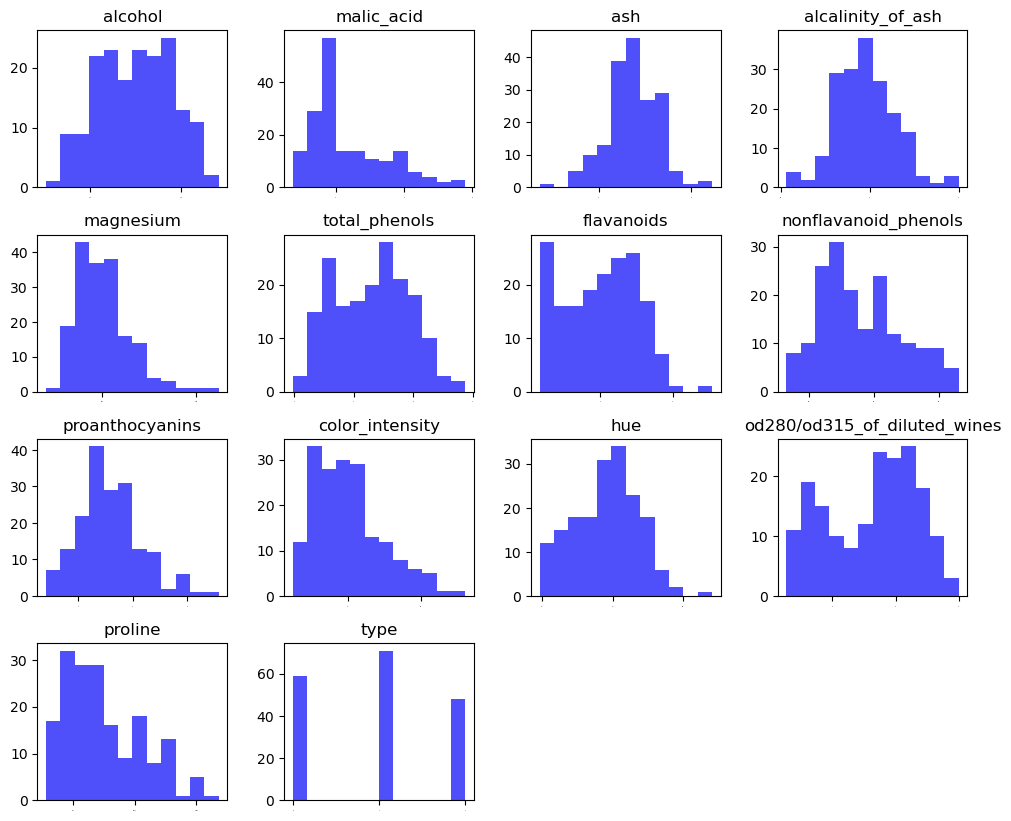

In [13]:
colors = palette=sns.light_palette('blue', 4)
df.hist(bins=12, grid=False, figsize=(12, 10), xlabelsize=0, color=colors[-2])
plt.show()

## Correlation Matrix

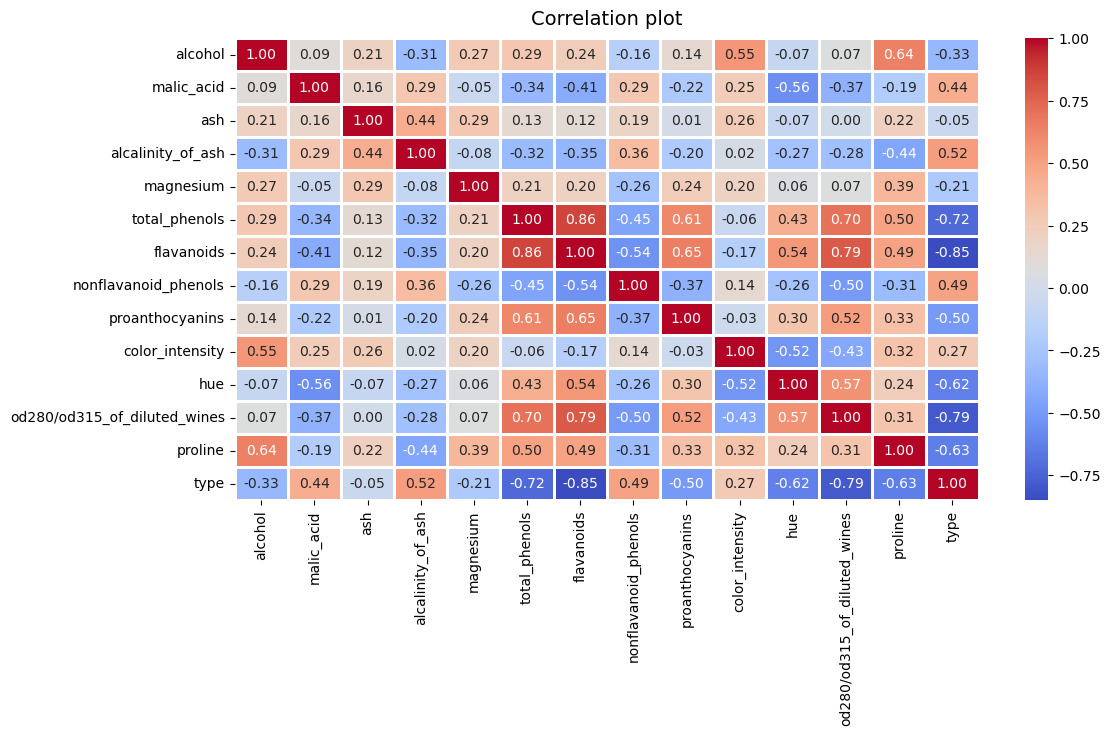

In [15]:
corr = df.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(round(corr, 2), 
            annot=True, cmap='coolwarm', linewidths=1, fmt='.2f')
plt.title("Correlation plot", size=14, pad=10)
plt.show()

## Box Plots

### Type vs Alcohol box plot

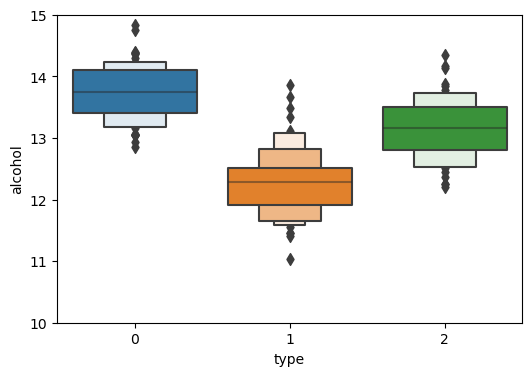

In [106]:
temp = pd.concat([df['type'], df['alcohol']], axis=1)

f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxenplot(x='type', y="alcohol", data=df)
fig.axis(ymin=10, ymax=15);

### Type vs Proanthocyanins box plot

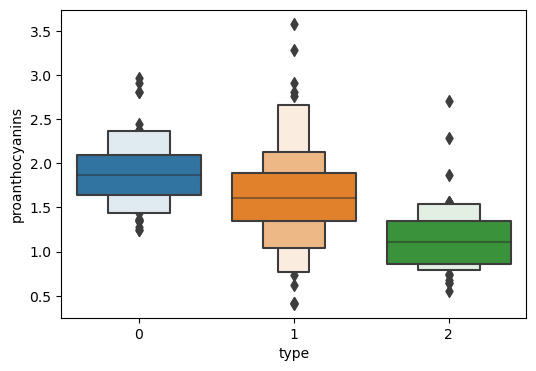

In [109]:
temp = pd.concat([df['type'], df['proanthocyanins']], axis=1)

f, ax = plt.subplots(figsize=(6, 4))
fig = sns.boxenplot(x='type', y="proanthocyanins", data=df)
#fig.axis(ymin=10, ymax=15);

## Scatter Plots

### od280 of diluted wines Vs Flavanoids - Total Phenols - Hue scatter plots

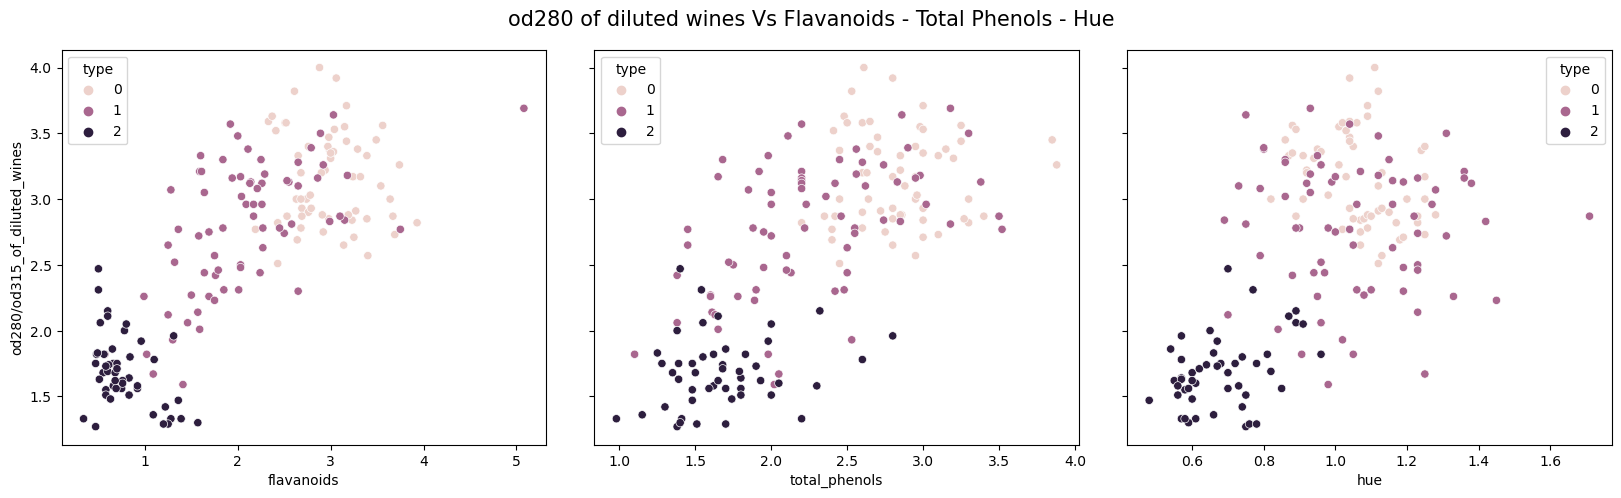

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 5))
f.suptitle("od280 of diluted wines Vs Flavanoids - Total Phenols - Hue", size=15)
f.subplots_adjust(top=0.90, wspace=0.1)

axes={ax1:'flavanoids', ax2:'total_phenols', ax3:'hue'}
for axs, col in axes.items():
    sns.scatterplot(data=df, 
                    x=col, 
                    y='od280/od315_of_diluted_wines', 
                    hue='type',
                    ax=axs)

### Proline Vs Alcohol - Alcalinity of ash - Total phenols scatter plots

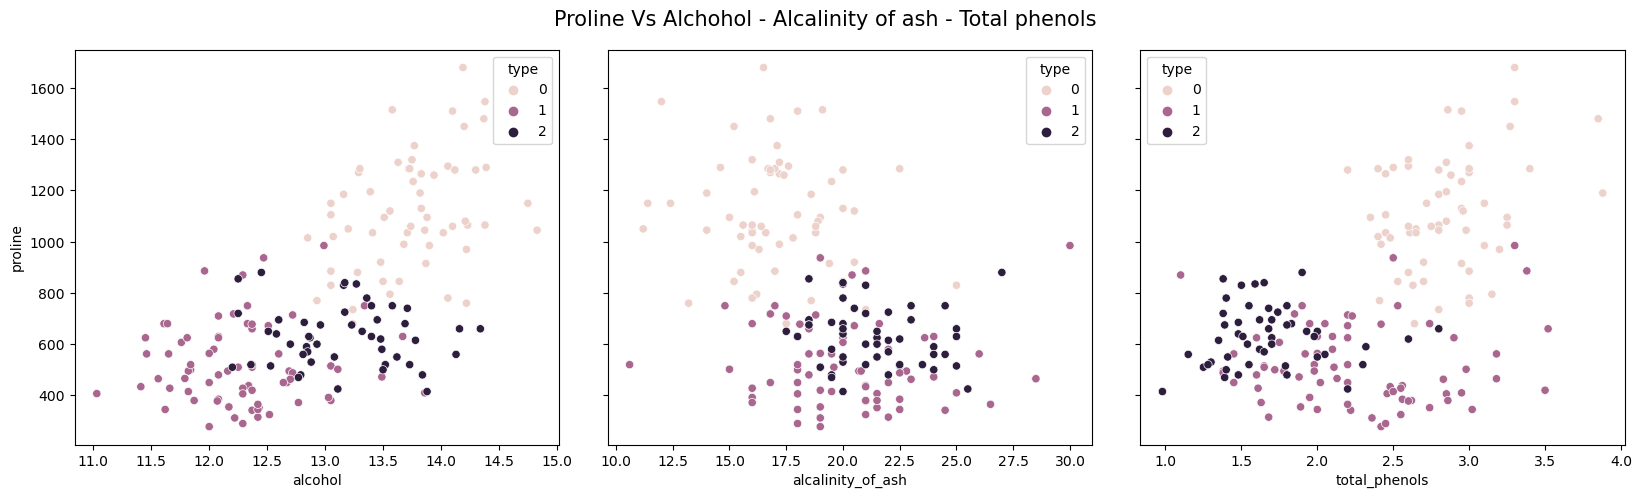

In [22]:
f, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(20, 5))
f.suptitle("Proline Vs Alchohol - Alcalinity of ash - Total phenols", size=15)
f.subplots_adjust(top=0.90, wspace=0.1)

axes={ax1:'alcohol', ax2:'alcalinity_of_ash', ax3:'total_phenols'}
for axs, col in axes.items():
    sns.scatterplot(data=df, 
                    x=col, 
                    y='proline', 
                    hue='type',
                    ax=axs)

## Skewness of features

In [25]:
df.skew().sort_values(ascending = False)

magnesium                       1.098191
malic_acid                      1.039651
color_intensity                 0.868585
proline                         0.767822
proanthocyanins                 0.517137
nonflavanoid_phenols            0.450151
alcalinity_of_ash               0.213047
type                            0.107431
total_phenols                   0.086639
flavanoids                      0.025344
hue                             0.021091
alcohol                        -0.051482
ash                            -0.176699
od280/od315_of_diluted_wines   -0.307285
dtype: float64

## Distribution of target class

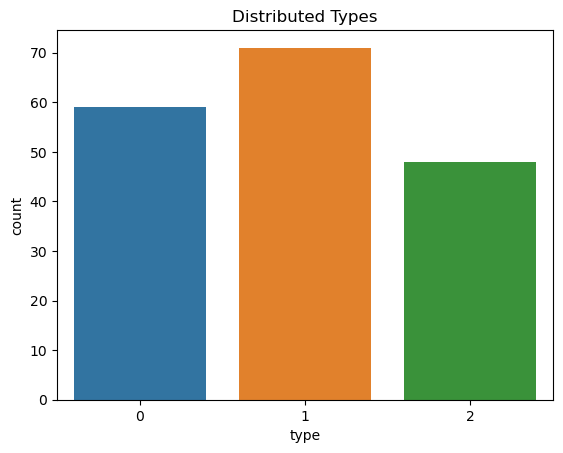

In [27]:
sns.countplot(x='type', data=df)
plt.title('Distributed Types')
plt.show()

# Model Creation

## Splitting Dataset

In [110]:
X = df.drop('type', axis = 1)
y = df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing Dataset

In [111]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
X_train_std = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_train.columns)

X_train = X_train_std.values
X_test = X_test_std.values
y_train = y_train.values
y_test = y_test.values

## Finding best machine learning model

In [112]:
classifiers = {"LogisiticRegression": LogisticRegression(),
               "KNearest": KNeighborsClassifier(),
               "Support Vector Classifier": SVC(),
               "DecisionTreeClassifier": DecisionTreeClassifier()}

for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 99.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 96.0 % accuracy score
Classifiers:  SVC Has a training score of 99.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 91.0 % accuracy score


## Hyperparameter tuning

In [84]:
log_reg_params = {"penalty": ['l1', 'l2', 'elasticnet', 'none'], 
                  'C': [0.001, 0.01, 0.1, 0.15, 0.25, 0.75, 0.5, 1, 1.5, 10, 100, 1000],
                  'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                  'max_iter': [10, 50, 100, 200, 500]
                 }

grid_log = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log.fit(X_train, y_train)
log_reg = grid_log.best_estimator_
print('Best Estimators: ', log_reg)

Best Estimators:  LogisticRegression(C=0.25, max_iter=10, solver='liblinear')


In [85]:
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5) #We will use best parameters for modeling
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  99.31%


## Training final model

In [86]:
model = LogisticRegression(C=1, solver='liblinear', max_iter=10)
model.fit(X_train, y_train)

LogisticRegression(C=1, max_iter=10, solver='liblinear')

# Evaluation and Results

## Classification Reports

In [89]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        57
           2       1.00      1.00      1.00        40

    accuracy                           1.00       142
   macro avg       1.00      1.00      1.00       142
weighted avg       1.00      1.00      1.00       142



In [90]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



## Confusion Matrix

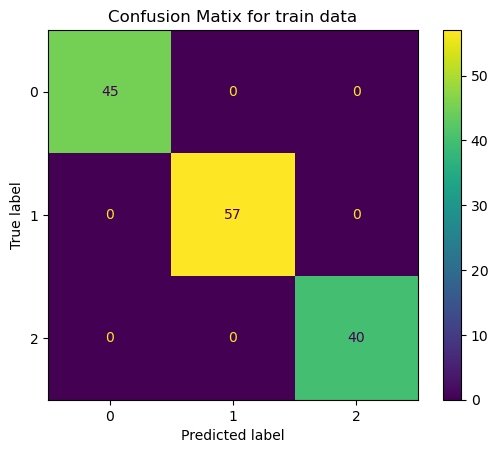

In [91]:
plot_confusion_matrix(model, X_train, y_train)
plt.title("Confusion Matix for train data")
plt.show()

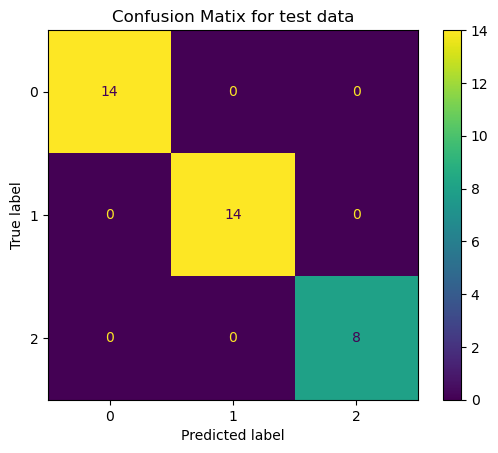

In [92]:
plot_confusion_matrix(model, X_test, y_test)
plt.title("Confusion Matix for test data")
plt.show()